In [2]:
%%capture
!pip install scikit-image
!pip install imutils

In [3]:
%%capture
!pip install diffusers transformers accelerate scipy safetensors

In [4]:
# basic python libraries
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# import torch
import torch
import torch.nn as nn                                        
import torchvision

import scipy.signal
from skimage import io
import cv2
import imutils

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [18]:
!nvidia-smi

Mon Sep 18 17:55:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.182.03   Driver Version: 470.182.03   CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   40C    P0    33W /  70W |   8611MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Task 1 - Text-to-Image Generation 

In [5]:
# import stable diffusion
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

In [6]:
# Use the Euler scheduler here (as mentioned in hugging face doc)
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

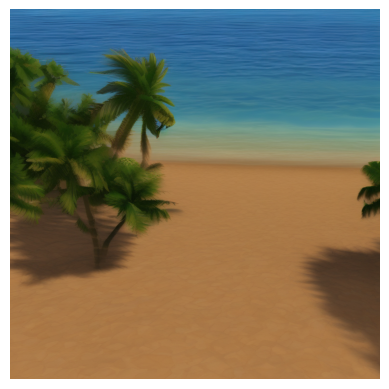

In [186]:
# initial prompt attempt
prompt = "Realistic Beach"
image = pipe(prompt, num_inference_steps=20).images[0]
# display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [133]:
height = 768
width = 768

num_inference_steps = 50            # Number of denoising steps

prompt = "A photo of a beach, ultraHD, high quality, photo-realistic, outdoors"
image = pipe(prompt, height=height, width=width, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

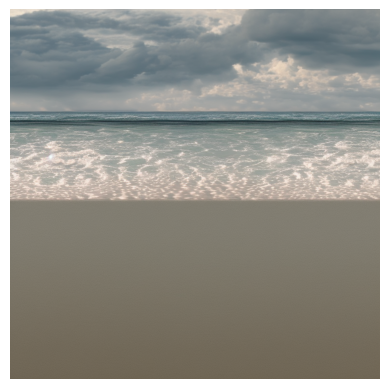

In [136]:
# display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [137]:
# create 100 images with the same prompt in the images folder

if not os.path.exists('images'):
    os.makedirs('images')

height = 768
width = 768

num_inference_steps = 50            # Number of denoising steps

prompt = "A photo of a beach, ultraHD, high quality, photo-realistic, outdoors"

for i in tqdm(range(100)):
    image = pipe(prompt, height=height, width=width, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]
    image.save('images/image_'+str(i)+'.png')

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

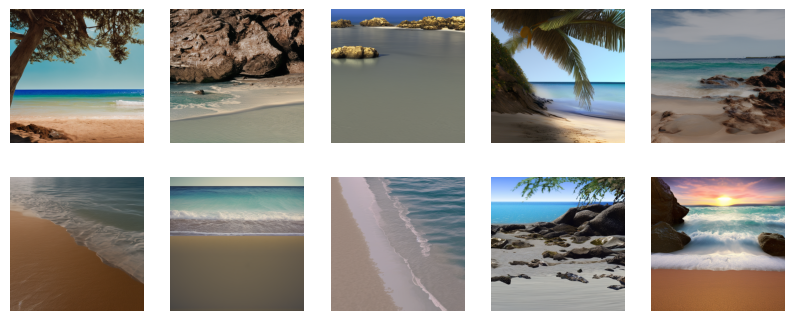

In [145]:
# show a grid of 10 images from the folder
fig = plt.figure(figsize=(10, 4))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = plt.imread('images/image_'+str(i)+'.png')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# Task 2 - Quantify Semantic and Style Divergence 

In [169]:
# Function to calculate pixe_wise between two images
def calculate_pixe_wise(image1, image2):
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    abs_diff = cv2.absdiff(gray_image1, gray_image2)
    pixe_wise = np.mean(abs_diff)
    return pixe_wise

# Directory where the generated images are stored
image_dir = "images"

# Initialize an empty list to store pixe_wise values
pixe_wise_values = []

# Loop through each image as a reference
for reference_idx in tqdm(range(100), desc="Calculating pixe_wise"):
    reference_image = cv2.imread(os.path.join(image_dir, f"image_{reference_idx}.png"))
    current_pixe_wise_values = []
    
    # Loop through the remaining images (image_0 is the reference)
    for idx in range(100):
        if idx == reference_idx:
            continue
        
        current_image = cv2.imread(os.path.join(image_dir, f"image_{idx}.png"))
        pixe_wise = calculate_pixe_wise(reference_image, current_image)
        current_pixe_wise_values.append(pixe_wise)
    
    pixe_wise_values.extend(current_pixe_wise_values)

Calculating SCD:   0%|          | 0/100 [00:00<?, ?it/s]

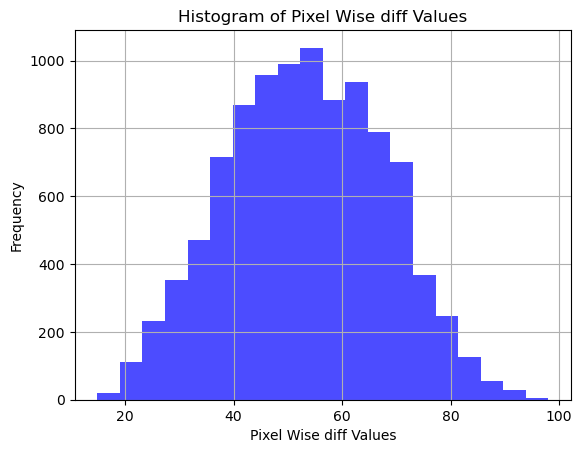

In [188]:
plt.hist(scd_values, bins=20, color='blue', alpha=0.7)
plt.xlabel("Pixel Wise diff Values")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Wise diff Values")
plt.grid(True)
plt.show()

In [208]:
print("Mean of Pixel Wise diff Values: ", np.mean(scd_values))
print("Standard deviation of Pixel wise diff values: ", np.std(scd_values))

Mean of Pixel Wise diff Values:  53.24798990816915
Standard deviation of Pixel wise diff values:  14.507420323535134


In [167]:
# Function to calculate semantic divergence using Sobel edge detection
def calculate_edge_based(image1, image2):
    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Apply Sobel edge detection
    edge_image1 = cv2.Sobel(gray_image1, cv2.CV_64F, 1, 1, ksize=5)
    edge_image2 = cv2.Sobel(gray_image2, cv2.CV_64F, 1, 1, ksize=5)
    
    # Calculate the absolute difference between edge maps
    edge_diff = np.abs(edge_image1 - edge_image2)
    
    # Calculate the mean absolute difference as the semantic divergence
    edge_based = np.mean(edge_diff)
    
    return edge_based

# Directory where the generated images are stored
image_dir = "images"

# Initialize an empty list to store semantic divergence values
edge_based_values = []

# Loop through each image as a reference
for reference_idx in tqdm(range(100), desc="Calculating Semantic divergence using sobel"):
    reference_image = cv2.imread(os.path.join(image_dir, f"image_{reference_idx}.png"))
    for idx in range(100):
        if idx == reference_idx:
            continue
        current_image = cv2.imread(os.path.join(image_dir, f"image_{idx}.png"))
        edge_based = calculate_edge_based(reference_image, current_image)
        edge_based_values.append(edge_based)



Calculating Semantic divergence using sobel:   0%|          | 0/100 [00:00<?, ?it/s]

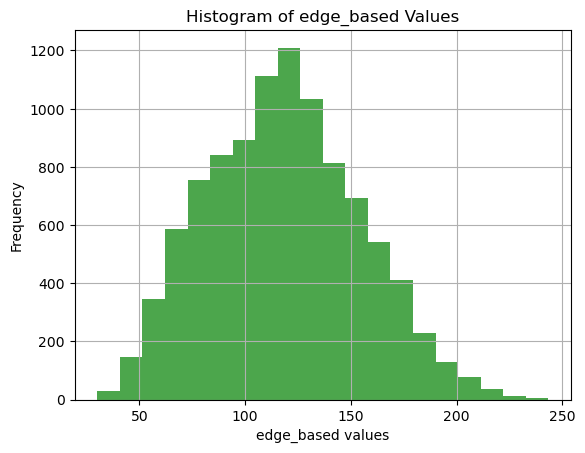

In [210]:
# Plot a histogram of the semantic divergence values
plt.hist(edge_based_values, bins=20, color='green', alpha=0.7)
plt.xlabel("edge_based values")
plt.ylabel("Frequency")
plt.title("Histogram of edge_based Values")
plt.grid(True)
plt.show()

In [211]:
print("Mean of edge_based: ", np.mean(edge_based_values))
print("Standard deviation of edge_based: ", np.std(edge_based_values))

Mean of edge_based:  118.09740244239268
Standard deviation of edge_based:  35.94090416327161


In [174]:
# Function to calculate style divergence using histogram-based metrics
def calculate_style_divergence(image1, image2):
    # Convert images to the LAB color space for better color representation
    lab_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2LAB)
    lab_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2LAB)
    
    # Calculate histograms for the 'a' and 'b' channels of LAB color space
    hist_a1 = cv2.calcHist([lab_image1], [1], None, [256], [0, 256])
    hist_a2 = cv2.calcHist([lab_image2], [1], None, [256], [0, 256])
    hist_b1 = cv2.calcHist([lab_image1], [2], None, [256], [0, 256])
    hist_b2 = cv2.calcHist([lab_image2], [2], None, [256], [0, 256])
    
    # Calculate the Bhattacharyya distance between histograms
    bhattacharyya_a = cv2.compareHist(hist_a1, hist_a2, cv2.HISTCMP_BHATTACHARYYA)
    bhattacharyya_b = cv2.compareHist(hist_b1, hist_b2, cv2.HISTCMP_BHATTACHARYYA)
    
    # Calculate the overall style divergence as the mean of Bhattacharyya distances
    style_divergence = (bhattacharyya_a + bhattacharyya_b) / 2
    
    return style_divergence

# Directory where the generated images are stored
image_dir = "images"

# Initialize an empty list to store style divergence values
style_divergence_values = []

# Load image paths
image_paths = [os.path.join(image_dir, f"image_{idx}.png") for idx in range(100)]

# Loop through all pairs of images and calculate style divergence
for reference_path in tqdm(image_paths, desc="Calculating Style Divergence"):
    reference_image = cv2.imread(reference_path)
    for current_path in image_paths:
        if reference_path == current_path:
            continue  # Skip comparing the image to itself
        current_image = cv2.imread(current_path)
        style_divergence = calculate_style_divergence(reference_image, current_image)
        style_divergence_values.append(style_divergence)


Calculating Style Divergence:   0%|          | 0/100 [00:00<?, ?it/s]

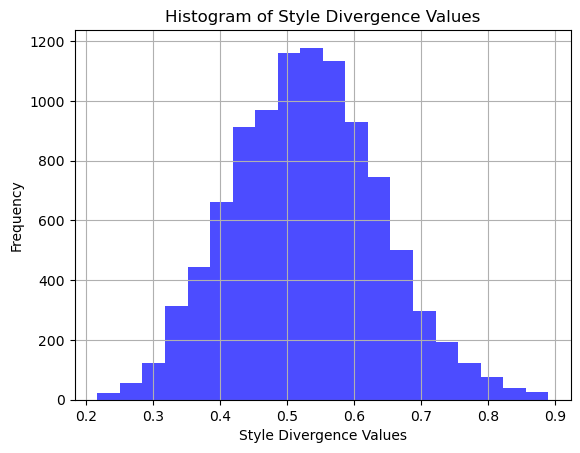

In [175]:
# Plot a histogram of the style divergence values
plt.hist(style_divergence_values, bins=20, color='blue', alpha=0.7)
plt.xlabel("Style Divergence Values")
plt.ylabel("Frequency")
plt.title("Histogram of Style Divergence Values")
plt.grid(True)
plt.show()

In [178]:
# Function to calculate style divergence using Gabor texture analysis
def calculate_style_divergence_gabor(image1, image2):
    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Define Gabor filter parameters
    num_orientations = 8
    num_scales = 8
    gabor_style_divergence = 0
    
    # Apply Gabor filters and calculate style divergence
    for orientation in range(num_orientations):
        for scale in range(num_scales):
            # Create a Gabor filter
            gabor_filter = cv2.getGaborKernel((15, 15),5.0, np.pi / num_orientations * orientation, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            
            # Apply the Gabor filter to the images
            filtered_image1 = cv2.filter2D(gray_image1, cv2.CV_32F, gabor_filter)
            filtered_image2 = cv2.filter2D(gray_image2, cv2.CV_32F, gabor_filter)
            
            # Calculate the absolute difference between filtered images
            abs_diff = np.abs(filtered_image1 - filtered_image2)
            
            # Accumulate the style divergence value
            gabor_style_divergence += np.mean(abs_diff)
    
    return gabor_style_divergence

# Directory where the generated images are stored
image_dir = "images"

# Initialize an empty list to store Gabor-style divergence values
gabor_style_divergence_values = []

# Load image paths
image_paths = [os.path.join(image_dir, f"image_{idx}.png") for idx in range(100)]

# Loop through all pairs of images and calculate style divergence using Gabor filters
for reference_path in tqdm(image_paths, desc="Calculating Style Divergence (Gabor)"):
    reference_image = cv2.imread(reference_path)
    for current_path in image_paths:
        if reference_path == current_path:
            continue  # Skip comparing the image to itself
        current_image = cv2.imread(current_path)
        style_divergence_gabor = calculate_style_divergence_gabor(reference_image, current_image)
        gabor_style_divergence_values.append(style_divergence_gabor)



Calculating Style Divergence (Gabor):   0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Plot a histogram of the Gabor-style divergence values
plt.hist(gabor_style_divergence_values, bins=20, color='purple', alpha=0.7)
plt.xlabel("Style Divergence Values (Gabor)")
plt.ylabel("Frequency")
plt.title("Histogram of Style Divergence Values (Gabor)")
plt.grid(True)
plt.show()

# Task 3 - Enlarging Image Diversity 

## Method 1

In [190]:
# @title First install depencendies
!pip install git+https://github.com/ml-research/semantic-image-editing &> /dev/null
!pip install ftfy &> /dev/null

In [198]:
from semdiffusers import SemanticEditPipeline

In [199]:
pipe = SemanticEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    
    safety_checker=None,
).to('cuda')
gen = torch.Generator(device='cuda')

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/semdiffusers/pipeline_latent_edit_diffusion.py:79: UserWarning: You have disabled the safety checker for <class 'semdiffusers.pipeline_latent_edit_diffusion.SemanticEditPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
  warnings.warn(


In [200]:
from PIL import Image
def image_grid(imgs, rows, cols, spacing = 20):
    assert len(imgs) == rows * cols
    
    w, h = imgs[0].size
    
    grid = Image.new('RGBA', size=(cols * w + (cols-1)*spacing, rows * h + (rows-1)*spacing ), color=(255,255,255,0))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=( i // rows * (w+spacing), i % rows * (h+spacing)))
        #print(( i // rows * w, i % rows * h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

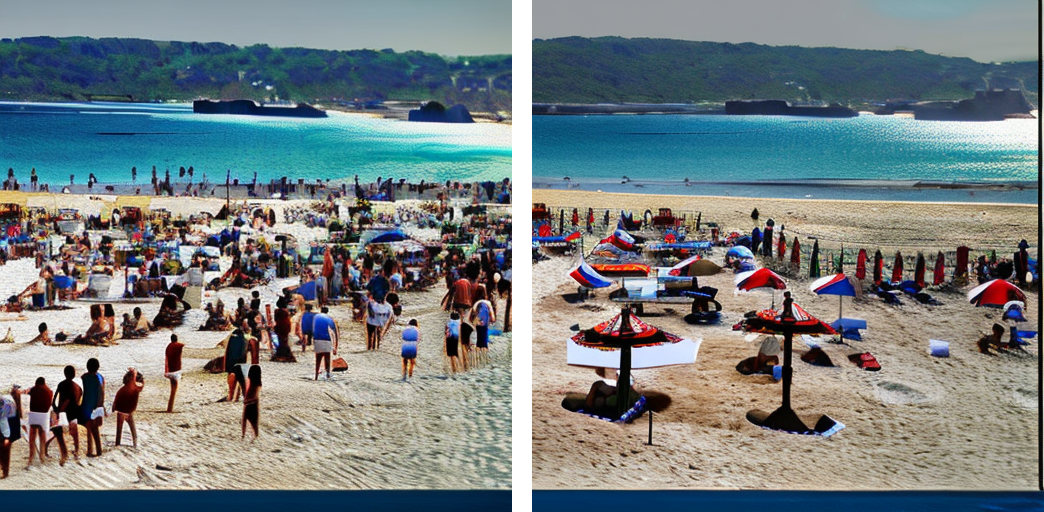

In [203]:
target = {'editing_prompt': 'crowded', 'reverse_editing_direction':True, 'edit_warmup_steps':10
          , 'edit_guidance_scale':8.3, 'edit_threshold':0.9, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

seed = 9
prompt = "A photo of a crowded beach, ultraHD, high quality, photo-realistic, outdoors"
gen.manual_seed(seed)
org = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7)

gen.manual_seed(seed)
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7,
       **target)

image_grid((org.images[0], out.images[0]), rows=1, cols=2)

## Method 2

In [9]:
height = 768
width = 768

guidance_scale = 3
num_inference_steps = 50            # Number of denoising steps

prompt = "A photo of a beach, ultraHD, high quality, photo-realistic, outdoors"
for i in tqdm(range(10)):
    image = pipe(prompt, height=height, width=width, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]
    image.save('images_task_3/image_'+str(i)+'.png')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

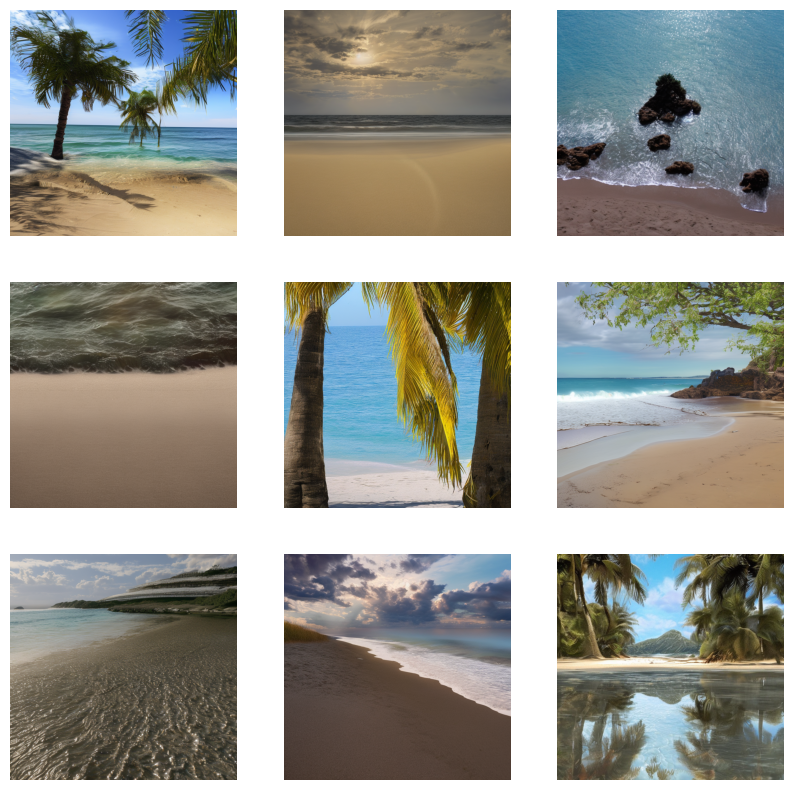

In [22]:
# show a grid of 10 images from the folder
fig = plt.figure(figsize=(10, 10))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = plt.imread('images_task_3/image_'+str(i)+'.png')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

## Method 3 

In [14]:
# Directory to save generated images
output_dir = 'generated_images'
os.makedirs(output_dir, exist_ok=True)

# List of different prompts or text descriptions
prompts = [
    "A photo of a beach, ultraHD, high quality, photo-realistic, outdoors",
    "A serene beach at sunrise",
    "UltraHD tropical beach.",
    "High-quality sunset beach.",
    "Photo-realistic beach with palm trees.",
    "Vibrant beach at sunrise.",
    "Detailed water sports at the beach.",
    "Secluded cove on the beach.",
    "Land, sea, and sky on the beach.",
    "Surreal beach with dream-like colors.",
    "Minimalist tranquility at the beach."
]

# Number of diverse images to generate for each prompt
num_images_per_prompt = 1

# Explore latent space and generate diverse images
for prompt in prompts:
    for i in range(num_images_per_prompt):
        image = pipe(prompt, height=height, width=width, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]
        image.save('task_3_method_3/image_'+ f"{prompt[:10]}_{i}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

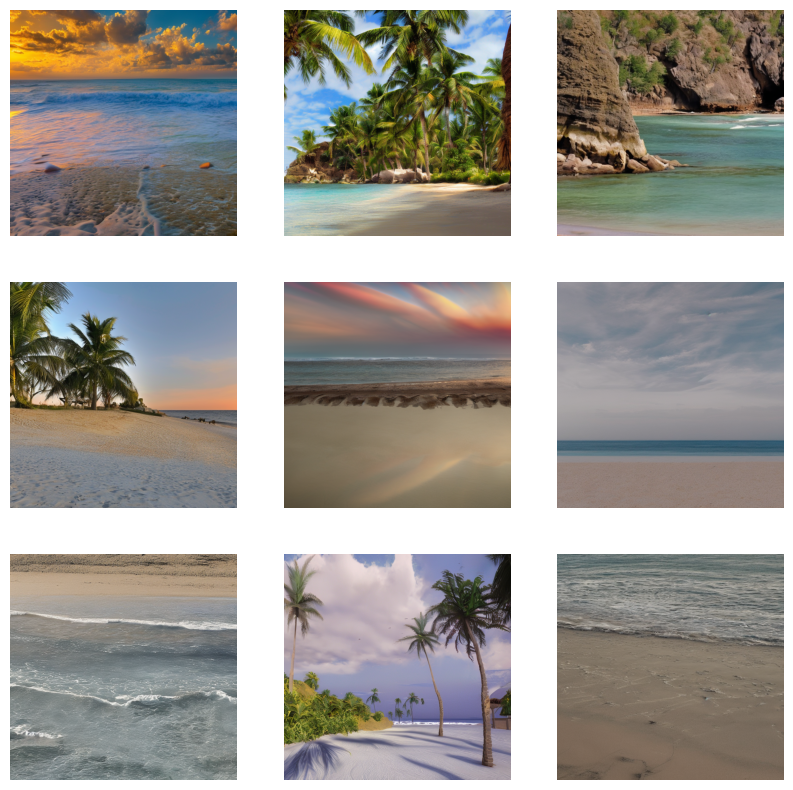

In [25]:
# show a grid of 10 images from the folder
fig = plt.figure(figsize=(10, 10))
columns = 3
rows = 3
# get all the file name in task_3_method_3
files = [f for f in os.listdir('task_3_method_3') if f.endswith('.png')]
for i in range(1, columns*rows +1):
    img = plt.imread('task_3_method_3/'+files[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')